In [20]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Step 1: Data Exploration and Understanding

In [21]:
data_dir = 'D:\\8TH SEMESTER\\MACHINE LEARNING\\LAB\\lab14\\dataset'
categories = ['cats', 'dogs']
img_size = 128

In [22]:
def load_and_preprocess_image(img_path):
    img = tf.keras.preprocessing.image.load_img(img_path, target_size=(img_size, img_size))
    img = tf.keras.preprocessing.image.img_to_array(img) / 255.0
    return img

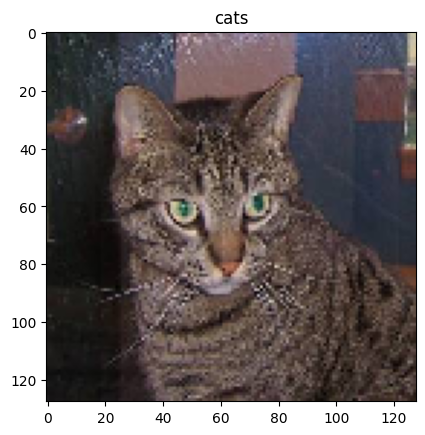

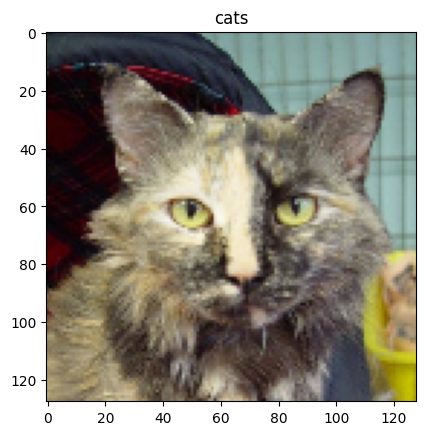

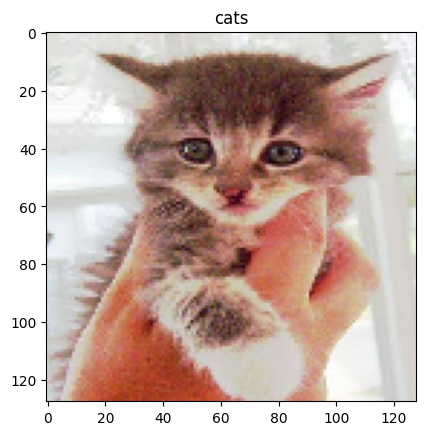

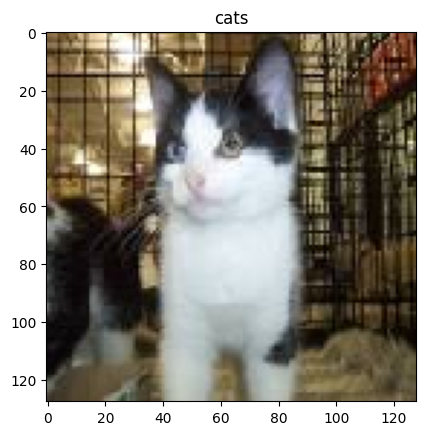

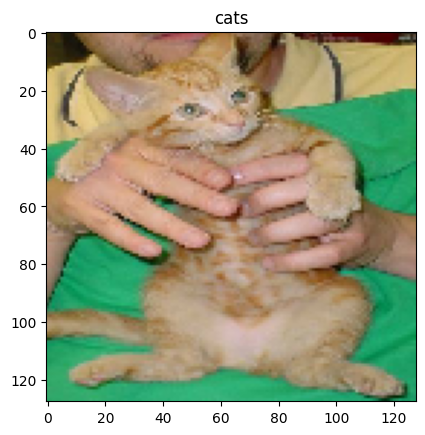

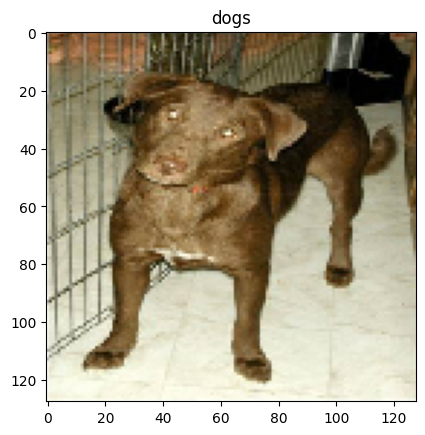

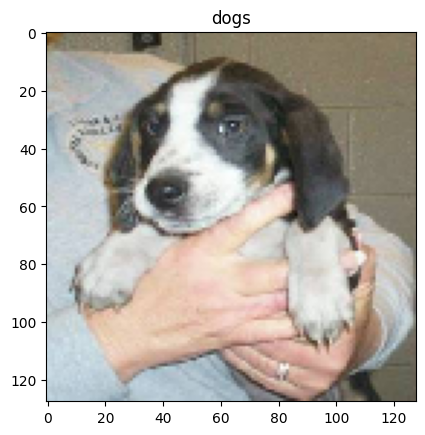

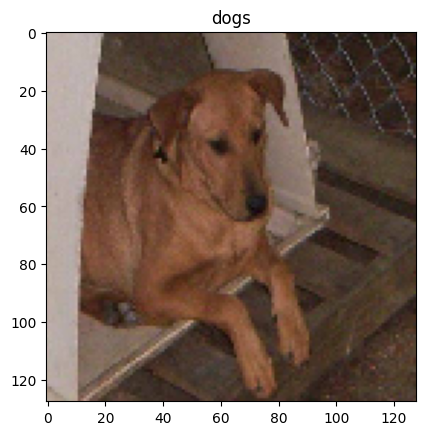

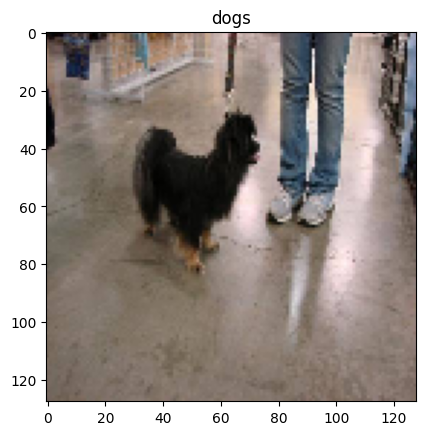

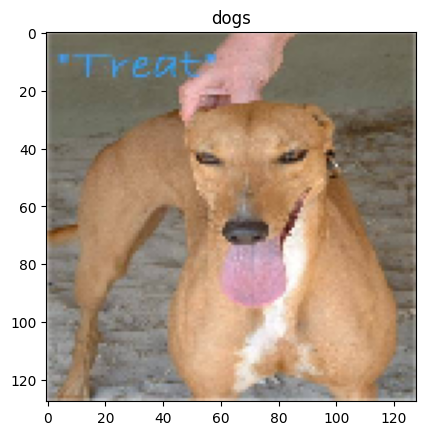

In [23]:
# loading a few images
for category in categories:
    path = os.path.join(data_dir, category)
    for img in os.listdir(path)[:5]:
        img_path = os.path.join(path, img)
        img = load_and_preprocess_image(img_path)
        plt.imshow(img)
        plt.title(category)
        plt.show()


# Step 2: Analysis and Visualization

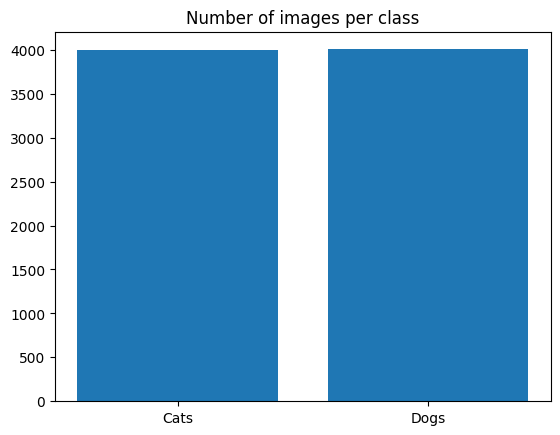

In [24]:
# Plotting the distribution of classes
num_cats = len(os.listdir(os.path.join(data_dir, 'cats')))
num_dogs = len(os.listdir(os.path.join(data_dir, 'dogs')))
plt.bar(['Cats', 'Dogs'], [num_cats, num_dogs])
plt.title('Number of images per class')
plt.show()


# Step 3: Data Preprocessing and Cleaning

In [25]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    horizontal_flip=True,
    rotation_range=20,
    zoom_range=0.2
)

train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_size, img_size),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)


Found 6404 images belonging to 2 classes.
Found 1601 images belonging to 2 classes.


# Step 5: Model Implementation

In [26]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [27]:
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Step 6: Training and Evaluation

In [28]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
201/201 [==============================] - 198s 973ms/step - loss: 0.6777 - accuracy: 0.5723 - val_loss: 0.6283 - val_accuracy: 0.6465
Epoch 2/10
201/201 [==============================] - 193s 959ms/step - loss: 0.6164 - accuracy: 0.6644 - val_loss: 0.6043 - val_accuracy: 0.6740
Epoch 3/10
201/201 [==============================] - 194s 963ms/step - loss: 0.5779 - accuracy: 0.7032 - val_loss: 0.5584 - val_accuracy: 0.7139
Epoch 4/10
201/201 [==============================] - 190s 945ms/step - loss: 0.5407 - accuracy: 0.7297 - val_loss: 0.5489 - val_accuracy: 0.7177
Epoch 5/10
201/201 [==============================] - 189s 940ms/step - loss: 0.5139 - accuracy: 0.7444 - val_loss: 0.4564 - val_accuracy: 0.7758
Epoch 6/10
201/201 [==============================] - 190s 943ms/step - loss: 0.4833 - accuracy: 0.7686 - val_loss: 0.4700 - val_accuracy: 0.7683
Epoch 7/10
201/201 [==============================] - 189s 942ms/step - loss: 0.4741 - accuracy: 0.7717 - val_loss: 0.4297 -

# Save the model


In [29]:
model.save('D:\\8TH SEMESTER\\MACHINE LEARNING\\LAB\\lab14\\cats_vs_dogs_model.h5')

c:\Python 3.11\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Step 7: Results Visualization and Analysis

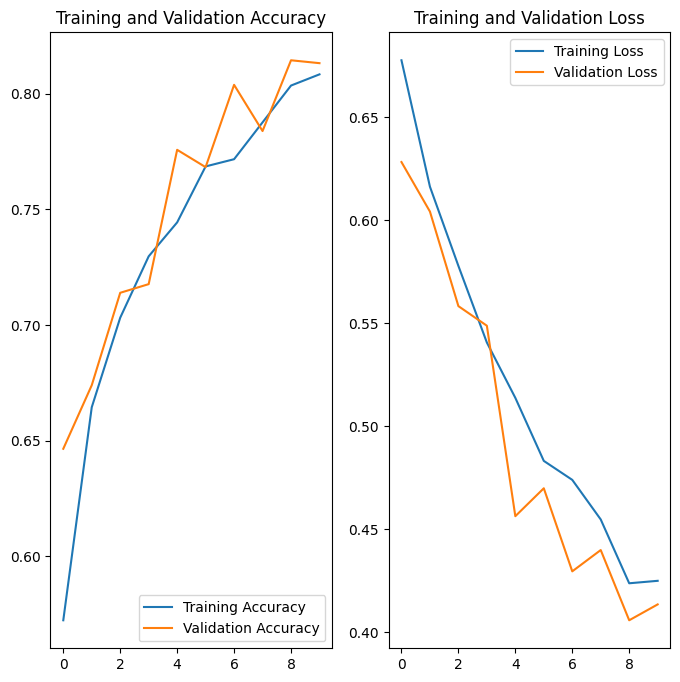

In [30]:
# Plotting training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


51/51 [==============================] - 14s 266ms/step


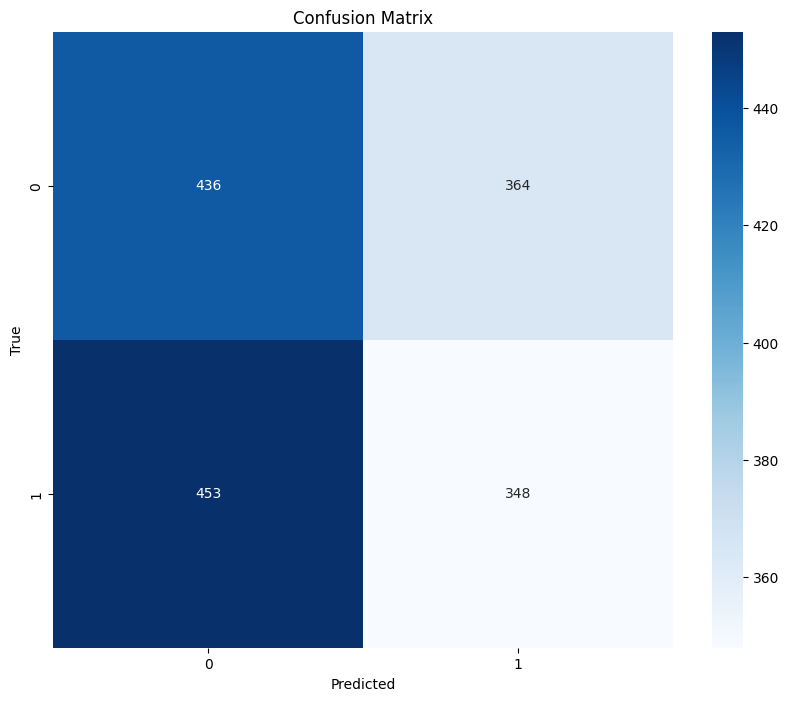

In [31]:
# Confusion Matrix and Classification Report
validation_generator.reset()
predictions = (model.predict(validation_generator) > 0.5).astype("int32")
true_labels = validation_generator.classes

conf_matrix = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [32]:
print(classification_report(true_labels, predictions, target_names=categories))

              precision    recall  f1-score   support

        cats       0.49      0.55      0.52       800
        dogs       0.49      0.43      0.46       801

    accuracy                           0.49      1601
   macro avg       0.49      0.49      0.49      1601
weighted avg       0.49      0.49      0.49      1601



# Step 8: Loading the saved model and making predictions

In [33]:
saved_model = load_model('D:\\8TH SEMESTER\\MACHINE LEARNING\\LAB\\lab14\\cats_vs_dogs_model.h5')

# Predict on validation set
validation_generator.reset()
new_predictions = (saved_model.predict(validation_generator) > 0.5).astype("int32")

# Compare with the original predictions to ensure consistency
print(classification_report(true_labels, new_predictions, target_names=categories))

51/51 [==============================] - 14s 264ms/step
              precision    recall  f1-score   support

        cats       0.50      0.57      0.54       800
        dogs       0.50      0.43      0.46       801

    accuracy                           0.50      1601
   macro avg       0.50      0.50      0.50      1601
weighted avg       0.50      0.50      0.50      1601



#Predicitons

1/1 [==============================] - 0s 80ms/step


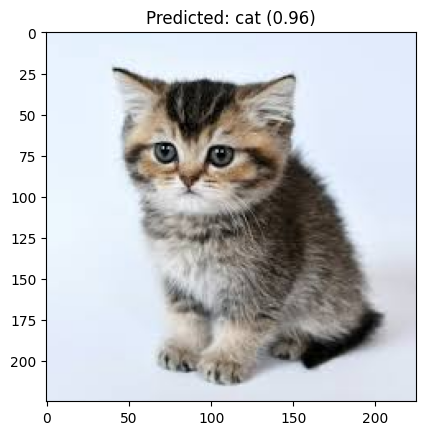

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess a single image
def load_and_preprocess_image(img_path, img_size=128):
    img = image.load_img(img_path, target_size=(img_size, img_size))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    return img_array

# Load the saved model
saved_model_path = 'D:\\8TH SEMESTER\\MACHINE LEARNING\\LAB\\lab14\\cats_vs_dogs_model.h5'
model = load_model(saved_model_path)

# Provide the path to the image you want to predict
img_path = 'D:\\8TH SEMESTER\\MACHINE LEARNING\\LAB\\lab14\\cat.jpg'

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make prediction
prediction = model.predict(img_array)

# Determine the class
predicted_class = 'dog' if prediction[0][0] > 0.5 else 'cat'
confidence = prediction[0][0] if predicted_class == 'dog' else 1 - prediction[0][0]

# Display the image and prediction
plt.imshow(image.load_img(img_path))
plt.title(f'Predicted: {predicted_class} ({confidence:.2f})')
plt.show()
